In [1]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'     
blue4 = '#3182bd'     # passenger colour
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'   # dev colour
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'     # neutral drift colour
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [2]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [3]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit
import csv
from scipy.integrate import simps

# Importing data

In [4]:
# All synonymous variants in Grail
filename="Grail_controls_synonymous_SNV.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Razavi_synonymous_results={} 
    
    for row in read_reader:
        if True: #ignore the header of the CSV file
            VAF = row[0]

            Razavi_synonymous_results[row_count]=(0, VAF, 0, 0, 0, 0)

        row_count=row_count+1

Razavi_synonymous = sorted(Razavi_synonymous_results.items(), key=lambda x: x[1][1], reverse=True)

# All missense variants in Grail
filename="Grail_controls_missense_SNV.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Razavi_missense_results={} 
    
    for row in read_reader:
        if True: #ignore the header of the CSV file
            VAF = row[0]

            Razavi_missense_results[row_count]=(0, VAF, 0, 0, 0, 0)

        row_count=row_count+1

Razavi_missense = sorted(Razavi_missense_results.items(), key=lambda x: x[1][1], reverse=True)

# top 20 variants in Grail
filename="Grail_controls_top20_variant_untrimmed_VAF.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Razavi_top20_results={} 
    
    for row in read_reader:
        if True: #ignore the header of the CSV file
            VAF = row[0]

            Razavi_top20_results[row_count]=(0, VAF, 0, 0, 0, 0)

        row_count=row_count+1

Razavi_top20 = sorted(Razavi_top20_results.items(), key=lambda x: x[1][1], reverse=True)

        
filename='Ahmet_silent_calls.csv'

Bolton_synonymous={}
list_of_syn_vaf=[]
untreated_patients={}
all_patients={}
                
with open(filename) as data:
    
    reader = csv.DictReader(data,delimiter=',')
    row_count = 0

    for row in reader:

        patient_id=str(row['DMP_PATIENT_ID'])
        gene=str(row['Gene'])
        variant_class=str(row['VariantClass'])
        vaf=float(row['N_AltFreq'])
        therapy_status=str(row['therapy_binary'])
        age=str(row['age'])
        
            
        all_patients[patient_id] =  age   #ages of some treated patients are unavailable
        
        if therapy_status=='untreated':
            
            #ages of all untreated patients are available
            if age=='NA':
                print('age unavailable')
                age=0
            
            untreated_patients[patient_id] =  float(age)

            if variant_class=='Silent':
            
                list_of_syn_vaf.append(vaf)
                Bolton_synonymous[row_count]=vaf
                
        row_count = row_count + 1
           

n_untreated_patient_Bolton=len(untreated_patients.keys())
print('total no. of synonymous variants in Bolton untreated patients is', len(Bolton_synonymous.keys()))
# print('total number of synonymous variants is', len(list_of_syn_vaf))
# print('total number of all patients is', len(all_patients.keys()))
# print('total number of untreated patients is', len(untreated_patients.keys()))

total no. of synonymous variants in Bolton untreated patients is 221


In [5]:
filename3='Grail_ages.csv'

list_of_control_ages_Razavi=[]
with open(filename3,'r') as csvfile:
    read_reader = csv.DictReader(csvfile, delimiter=',')
    
    for row in read_reader:
        
        status= str(row['tissue'])
        age=int(row['age'])
        
        if status == 'Control':
            list_of_control_ages_Razavi.append(age)
            
print('There are', len(list_of_control_ages_Razavi), 'controls in Razavi 2019')

list_of_control_ages_Bolton=list(untreated_patients.values())
print('There are', len(list_of_control_ages_Bolton), 'untreated controls in Zehir')

list_of_control_ages = list_of_control_ages_Razavi + list_of_control_ages_Bolton
# list_of_control_ages = list_of_control_ages_Razavi 
print('mean of Razavi+Bolton ages:',np.mean(list_of_control_ages),'std of Razavi+Bolton ages:', np.std(list_of_control_ages))
print('mean of Razavi ages:',np.mean(list_of_control_ages_Razavi),'std of Razavi ages:',np.std(list_of_control_ages_Razavi))
print('mean of Bolton ages:',np.mean(list_of_control_ages_Bolton),'std of Bolton ages:',np.std(list_of_control_ages_Bolton))


There are 47 controls in Razavi 2019
There are 590 untreated controls in Zehir
mean of Razavi+Bolton ages: 66.64081922291993 std of Razavi+Bolton ages: 12.106963339126546
mean of Razavi ages: 57.808510638297875 std of Razavi ages: 15.860614001519801
mean of Bolton ages: 67.34440990677966 std of Bolton ages: 11.467621235719768


# Import Bolton nonsynonymous data

In [6]:
# import Bolton nonsynonymous variant data 1
import csv
filename="CH_Silent_calls.csv"

list_of_untreated_patients_ages = []
Patient_dictionary = {}
Untreated_patients_dictionary = {}
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        gene_name = row['Gene']
        treatment_status = str(row['therapy_binary'])
        mutation_type = row['VariantClass']
        age = row['age']

        if treatment_status == 'untreated' and patient_id not in Untreated_patients_dictionary.keys():
            Untreated_patients_dictionary[patient_id]=0
            list_of_untreated_patients_ages.append(age)

print('Number of unique untreated patients', len(Untreated_patients_dictionary.keys()))

list_of_Bolton_ages = []
for age in list_of_untreated_patients_ages:
    list_of_Bolton_ages.append(float(age))
    

Number of unique untreated patients 590


In [7]:
# import Bolton nonsynonymous variant data 2
import csv
filename="All_CH_mutations_for_jamie.csv"

Patient_dictionary = {}
panel_version_possibilities = []
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        gene_name = row['Gene']
        panel_version = row['Version']
        mutation_type = row['VariantClass']
        VAF = float(row['N_AltFreq'])
                 
            
        if panel_version not in panel_version_possibilities:
            panel_version_possibilities.append(panel_version)
        
        if patient_id in Untreated_patients_dictionary.keys():
#             if panel_version == 'v3' and gene_name not in genes_on_panel_341_genes:
#                 print('v3 not 341-gene-panel', patient_id, 'gene:', gene_name)
                
#             if panel_version == 'v5' and gene_name not in genes_on_panel_410_genes:
#                 print('v5 not 410-gene-panel', patient_id, 'gene:', gene_name)
                
#             if panel_version == 'v6' and gene_name not in genes_on_panel_468_genes:
#                 print('v6 not 468-gene-panel', patient_id, 'gene:', gene_name)
            
            if patient_id not in Patient_dictionary.keys():
                Patient_dictionary[patient_id] = [panel_version]
            else:
                if panel_version != Patient_dictionary[patient_id][0]:
                    
                    tmp=Patient_dictionary[patient_id]
                    tmp.append(panel_version)
                    Patient_dictionary[patient_id] = tmp
                    print('patient', patient_id,'was sequenced on different panels', Patient_dictionary[patient_id])

print('Number of untreated patients with any CH mutations', len(Patient_dictionary.keys()))
print('panel_version_possibilities', panel_version_possibilities)

# assigning the largest panel to patients sequenced on more than one panel
if patient_id == 'P-0001766':
    Patient_dictionary[patient_id]=['v6']
if patient_id == 'P-0013820':
    Patient_dictionary[patient_id]=['v6']

patient P-0001766 was sequenced on different panels ['v3', 'v6']
patient P-0001766 was sequenced on different panels ['v3', 'v6', 'v6']
patient P-0013820 was sequenced on different panels ['v5', 'v6']
Number of untreated patients with any CH mutations 590
panel_version_possibilities ['v3', 'v5', 'v6']


In [8]:
# import all nonsynonymous data
import csv
filename="All_CH_mutations_for_jamie.csv"

all_non_syn_data = []
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        gene_name = row['Gene']
        panel_version = row['Version']
        mutation_type = row['VariantClass']
        VAF = float(row['N_AltFreq'])
        aa_change = row['AAchange'] 
        
        row_count = row_count + 1
        
        if patient_id in Untreated_patients_dictionary.keys():
            
            if mutation_type =='Missense_Mutation' or mutation_type =='Nonsense_Mutation':
                
                all_non_syn_data.append(VAF)                
                
print('There are', len(all_non_syn_data),'non synonymous variants in any genes among untreated patients')


There are 389 non synonymous variants in any genes among untreated patients


# Trimming synonymous variant data

In [9]:

phi=2*10**-3
Bolton_synonymous_trimmed_above_phi_list = []
Razavi_synonymous_trimmed_above_phi_list = []

Razavi_synonymous_trimmed_below_phi_list = []

Bolton_synonymous_trimmed_list = []

Razavi_synonymous_trimmed_list = []
Razavi_missense_trimmed_list = []
Razavi_top20_trimmed_list = []


Razavi_upper_limit = 0.2
Razavi_lower_limit = 0.0005
Bolton_lower_limit = 0
Bolton_upper_limit = 0.5


for (row_count,  VAF) in Razavi_synonymous:
    if Razavi_lower_limit<=float(VAF[1])<=Razavi_upper_limit:
        Razavi_synonymous_trimmed_list.append(float(VAF[1]))
        
for (row_count,  VAF) in Razavi_synonymous:
    if Razavi_lower_limit<=float(VAF[1])<=phi:
        Razavi_synonymous_trimmed_below_phi_list.append(float(VAF[1]))
        
for (row_count,  VAF) in Razavi_synonymous:
    if phi<=float(VAF[1])<=Razavi_upper_limit:
        Razavi_synonymous_trimmed_above_phi_list.append(float(VAF[1]))
        
for (row_count,  VAF) in Razavi_missense:
    if Razavi_lower_limit<=float(VAF[1])<=Razavi_upper_limit:
        Razavi_missense_trimmed_list.append(float(VAF[1]))        

for (row_count,  VAF) in Razavi_top20:
    if Razavi_lower_limit<=float(VAF[1])<=Razavi_upper_limit:
        Razavi_top20_trimmed_list.append(float(VAF[1]))        

for VAF in Bolton_synonymous.values():
    if Bolton_lower_limit<=VAF<=Bolton_upper_limit:
        Bolton_synonymous_trimmed_list.append(float(VAF))
        
for VAF in Bolton_synonymous.values():
    if phi<=VAF<=Bolton_upper_limit:
        Bolton_synonymous_trimmed_above_phi_list.append(float(VAF))

print('number of synonymous variants in two studies',\
      len(Razavi_synonymous_trimmed_list)+len(Bolton_synonymous_trimmed_list))
print('number of synonymous variants in Razavi below phi', len(Razavi_synonymous_trimmed_below_phi_list))

number of synonymous variants in two studies 1514
number of synonymous variants in Razavi below phi 1020


# Normalize VAF densities

In [10]:
def normalised_VAF_normalised_densities_list(trimmed_VAF_list, study_total, mu, binmethod):
    y1 = []
    for i in trimmed_VAF_list:
        VAFs = float(i)
        y = np.log(VAFs)
        y1.append(y)
        
    normed_value = study_total*2*mu
    hist, bins = np.histogram(y1, bins=binmethod, range=(min(y1),max(y1)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)

#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
    
    VAF_densities=[]
    lower_error = []
    upper_error = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error)
    for a, b, c, d in VAF_densities_zip:
        VAF_densities.append((a, b, c, d))
        
    return VAF_densities

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

In [11]:
Razavitotal = 47
Boltontotal = 590

Razavi_top20_mu = 2.76*10**-7

Razavi_panel_size = 2130*10**3 
Bolton_panel_size = 1139322  # bp

nonsynonymous_mu_per_bp = 1.3617021276595745e-09
synonymous_mu_per_bp = 5.390070921985816e-10
mu_per_bp = 1.9007092198581563e-09

Razavi_synonymous_mu = synonymous_mu_per_bp*Razavi_panel_size
Bolton_synonymous_mu = synonymous_mu_per_bp*Bolton_panel_size
Bolton_nonsynonymous_mu = nonsynonymous_mu_per_bp*Bolton_panel_size
print('Bolton_synonymous_mu',Bolton_synonymous_mu)

syn_total_mut_sites_ratio = 0.2835820895522388
number_of_developmental_mut = 0.6  # per haploid per doubling
haploid_genome_size = 3*10**9

Razavi_dev_per_doubling_synonymous_mu = number_of_developmental_mut/haploid_genome_size*Razavi_panel_size*syn_total_mut_sites_ratio
Bolton_dev_per_doubling_synonymous_mu = number_of_developmental_mut/haploid_genome_size*Bolton_panel_size*syn_total_mut_sites_ratio
print('Razavi_dev_per_doubling_synonymous_mu', Razavi_dev_per_doubling_synonymous_mu)
print('Bolton_dev_per_doubling_synonymous_mu', Bolton_dev_per_doubling_synonymous_mu)

Razavi_dev_per_doubling_synonymous_mu_LeeSix = 1.84/haploid_genome_size*Razavi_panel_size*syn_total_mut_sites_ratio
Bolton_dev_per_doubling_synonymous_mu_LeeSix = 1.84/haploid_genome_size*Bolton_panel_size*syn_total_mut_sites_ratio
print('Razavi_dev_per_doubling_synonymous_mu_LeeSix', Razavi_dev_per_doubling_synonymous_mu_LeeSix)
print('Bolton_dev_per_doubling_synonymous_mu_LeeSix', Bolton_dev_per_doubling_synonymous_mu_LeeSix)

print('Bolton_dev_per_doubling_synonymous_mu_LeeSix/Bolton_synonymous_mu',Bolton_dev_per_doubling_synonymous_mu_LeeSix/Bolton_synonymous_mu)

Bolton_synonymous_mu 0.0006141026382978724
Razavi_dev_per_doubling_synonymous_mu 0.0001208059701492537
Bolton_dev_per_doubling_synonymous_mu 6.461826268656716e-05
Razavi_dev_per_doubling_synonymous_mu_LeeSix 0.00037047164179104477
Bolton_dev_per_doubling_synonymous_mu_LeeSix 0.00019816267223880598
Bolton_dev_per_doubling_synonymous_mu_LeeSix/Bolton_synonymous_mu 0.3226865671641791


In [12]:
lam_da=2

binmethod = 'doane'
Razavi_synonymous_bins = 16
Bolton_synonymous_bins = 16
Bolton_synonymous_bins_above_phi = 10
Razavi_missense_bins = 16
Razavi_top20_bins = 6

# ***** this goes into the fitting
# Razavi_synonymous_bins_above_phi = 10
# Bolton_synonymous_bins_above_lmin = 10
Razavi_synonymous_bins_above_phi = 6
Bolton_synonymous_bins_above_lmin = 6



# trimmed lists are lists of strings

Razavi_VAF_densities_neutral = normalised_VAF_normalised_densities_list(Razavi_synonymous_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins)
Razavi_VAF_densities_missense = normalised_VAF_normalised_densities_list(Razavi_missense_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_missense_bins)
Razavi_VAF_densities_top20 = normalised_VAF_normalised_densities_list(Razavi_top20_trimmed_list, Razavitotal, Razavi_top20_mu, Razavi_top20_bins)
Bolton_VAF_densities_neutral = normalised_VAF_normalised_densities_list(Bolton_synonymous_trimmed_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins)

Razavi_VAF_densities_neutral_above_phi = normalised_VAF_normalised_densities_list(Razavi_synonymous_trimmed_above_phi_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins_above_phi)
Bolton_VAF_densities_neutral_above_phi = normalised_VAF_normalised_densities_list(Bolton_synonymous_trimmed_above_phi_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins_above_phi)

# Synonymous densities (normalised by 2 x mu)
Neutral_densities = Razavi_VAF_densities_neutral + Bolton_VAF_densities_neutral
Neutral_densities_above_phi = Razavi_VAF_densities_neutral_above_phi + Bolton_VAF_densities_neutral_above_phi

Neutral_densities_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in Neutral_densities:
    if i[1] != -(float('inf')):
        Neutral_densities_without_inf.append(i)
        
Neutral_densities_without_inf_above_phi = []    #remove the densities for the VAF bins for which there were no densities
for i in Neutral_densities_above_phi:
    if i[1] != -(float('inf')):
        Neutral_densities_without_inf_above_phi.append(i)

In [13]:
print('mutation rate across haploid genome',3*7.60E-05/(141*10**3)*3*10**9)
print('mutation rate in coding region across haploid genome',0.02*3*7.60E-05/(141*10**3)*3*10**9)

mutation rate across haploid genome 4.851063829787234
mutation rate in coding region across haploid genome 0.09702127659574468


In [14]:

Bolton_468panel_mu = mu_per_bp*Bolton_panel_size
Bolton_468panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_panel_size

print('Bolton_468panel_mu', Bolton_468panel_mu)
print('Bolton_468panel_non_syn_mu', Bolton_468panel_non_syn_mu)


Bolton_468panel_mu 0.0021655198297872344
Bolton_468panel_non_syn_mu 0.0015514171914893617


# Applying DFE

Only run the block below that corresponds to the desired DFE fit.

In [59]:
# expo power + delta + p free
p_inferred = 2.94551663
q_inferred = 0.08456544
alpha = 0.02270383
s_max_inferred = float('inf')


Bolton_468panel_functional_non_syn_mu = Bolton_468panel_non_syn_mu*alpha
print('Bolton_468panel_functional_non_syn_mu', Bolton_468panel_functional_non_syn_mu)

Bolton_468panel_functional_non_syn_mu 3.522311217465192e-05


In [87]:
# p=2
p_inferred = 2
q_inferred = 0.05999922
alpha = 0.04876069
s_max_inferred = float('inf')


Bolton_468panel_functional_non_syn_mu = Bolton_468panel_non_syn_mu*alpha
print('Bolton_468panel_functional_non_syn_mu', Bolton_468panel_functional_non_syn_mu)

Bolton_468panel_functional_non_syn_mu 7.564817273488341e-05


In [107]:
# p=3
p_inferred = 3
q_inferred = 0.08596145
alpha = 0.02257153
s_max_inferred = float('inf')


Bolton_468panel_functional_non_syn_mu = Bolton_468panel_non_syn_mu*alpha
print('Bolton_468panel_functional_non_syn_mu', Bolton_468panel_functional_non_syn_mu)

Bolton_468panel_functional_non_syn_mu 3.501785968021787e-05


In [127]:
# p=4
p_inferred = 4
q_inferred = 0.1001393
alpha = 0.0154429
s_max_inferred = float('inf')


Bolton_468panel_functional_non_syn_mu = Bolton_468panel_non_syn_mu*alpha
print('Bolton_468panel_functional_non_syn_mu', Bolton_468panel_functional_non_syn_mu)

Bolton_468panel_functional_non_syn_mu 2.3958380546451064e-05


In [108]:
s_tolerance = 3.5/100
print('The DFE has a lower cutt off at s=', s_tolerance)


The DFE has a lower cutt off at s= 0.035


In [128]:
#  New theory
import scipy.special as sc
import mpmath as mp

N_tau=10**5
N_tau_drift=4.87*10**4

# # log convex
weight_s= lambda s: np.exp(-((abs(s))/q_inferred)**p_inferred)
normalization=integrate.quad(weight_s, 0.0, float("inf"))[0]


def hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau
    
    expected_density=np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N_tau*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*( \
                                                                                      np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
                                         np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density



def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1
    expected_density=np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

def expected_density_hitchhiker_mutants_s_discrete(t, l, s1, mu_ben, N_tau):

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, mu_ben, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, mu_ben, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, mu_ben, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, mu_ben, s1)
    
    return density

def linProbtheory_actual_ages_hitch_discrete(l, s1, mu_ben, N_tau, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_density_hitchhiker_mutants_s_discrete(age, l, s1, mu_ben, N_tau)/len(list_of_control_ages)
    
    
    return total_density


def expected_density_hitchhiker_mutants_s_single(t, l, s1, b, d, mu_ben, N_tau):
    
    u_driver_at_s1 = mu_ben*np.exp(-((abs(s1))/d)**b)/normalization

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)
    
    return density

def expected_number_hitchhiker_mutants(t, l, b, d, mu_ben, s_lower, s_upper, N_tau):
    
    result = integrate.quad(lambda s_var: expected_density_hitchhiker_mutants_s_single(t,  l, s_var,\
                                                                        b, d, mu_ben, N_tau), s_lower, s_upper)[0]

    return result

def logProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
    mu_ben= params[2]
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_number_hitchhiker_mutants(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)/len(list_of_control_ages)


    return np.log(total_density)

def linProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
    mu_ben= params[2]
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_number_hitchhiker_mutants(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)/len(list_of_control_ages)

    return total_density


In [129]:

def logProbtheory_actual_ages_drift(l, N_tau, list_of_control_ages):
    u_neu=1/2
    density = 0
    
    for i in range(len(list_of_control_ages)):
        t = list_of_control_ages[i]
        density = density + 2*N_tau*u_neu*np.exp(-2*N_tau/(t)*(np.exp(l)/(1-2*np.exp(l))))/len(list_of_control_ages)
    
    
    return np.log(density)

def logProbtheory_ages_dev(l, u_dev, u_norm): # u_norm and target_size are the neutral mutation rates and the target size in the corresponding study

    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return np.log(density)

def linProbtheory_ages_dev(l, u_dev, u_norm): # u_norm and target_size are the neutral mutation rates and the target size in the corresponding study

    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return density

#  beneficial with cutoff
def Predicted_top20_with_cutoff(l, N_tau, t, u_top20, s):
    return 2*N_tau*u_top20*(1+2*np.exp(l)/(1-2*np.exp(l)))*np.exp(- 2*N_tau*s/(np.exp(s*t)-1)*np.exp(l)/(1-2*np.exp(l))      )

def logProbtheory_actual_ages_top20_normalized(l, list_of_variant_s, list_of_variant_u, list_of_control_ages, N_tau, u_top20):
    num_of_var=len(list_of_variant_s)
    density_beneficial_contributed_by_diff_variant_sumemd_across_ages = 0
    for i in range(num_of_var):
        s = list_of_variant_s[i]
        mu_driver = list_of_variant_u[i]

        density_beneficial_contributed_by_diff_ages=0
        for j in range(len(list_of_control_ages)):
            t=list_of_control_ages[j]

            density_beneficial_contributed_by_diff_ages=density_beneficial_contributed_by_diff_ages+\
            (Predicted_top20_with_cutoff(l, N_tau, t, u_top20, s)/(len(list_of_control_ages)))
            
        density_beneficial_contributed_by_diff_variant_sumemd_across_ages = \
        density_beneficial_contributed_by_diff_variant_sumemd_across_ages + density_beneficial_contributed_by_diff_ages/num_of_var

    return np.log(density_beneficial_contributed_by_diff_variant_sumemd_across_ages/sum(list_of_variant_u))

# Confidence levels

In [130]:

def rescaled_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = 2*study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = 2*study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)

    VAF_densities=[]
    lower_error = []
    upper_error = []
#     SD = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data, study_total, u_syn, dev_synonymous_mu, N_tau, list_of_control_ages, lmin, lmax, n_bins, s_lower, s_upper): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    # fits for diploid u_driver becos this is simulation
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = 2*study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[4]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch(l, [b_inferred, d_inferred, u_driver], N_tau, s_lower, s_upper, list_of_control_ages)\
                                                    +linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
                                                    )/bin_size,\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch(l, [b_inferred, d_inferred, u_driver], N_tau, s_lower, s_upper, list_of_control_ages)\
                                                    +linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
                                                    )/(bin_size/2),\
                                     logfreq-bin_size/2, logfreq)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_combined_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, N_tau, data1, study_total1, u_syn1, dev_synonymous_mu1, list_of_control_ages1, lmin1, lmax1, n_bins1,\
                                                                                           data2, study_total2, u_syn2, dev_synonymous_mu2, list_of_control_ages2, lmin2, lmax2, n_bins2): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    
    result1=squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data1, study_total1, u_syn1, dev_synonymous_mu1, N_tau, list_of_control_ages1, lmin1, lmax1, n_bins1)
    
    result2=squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data2, study_total2, u_syn2, dev_synonymous_mu2, N_tau, list_of_control_ages2, lmin2, lmax2, n_bins2)
    
    return result1+result2


In [131]:
# trim lists
log_phi=np.log(phi)
print('phi is', phi)
lmax=np.log(0.499)
lmin_Bolton=np.log(1.5/100)


# Razavi
Razavi_VAF_info_syn = rescaled_VAF_densities_list_simulation_SD(Razavi_synonymous_trimmed_above_phi_list, Razavitotal, Razavi_synonymous_mu,\
                                                                Razavi_synonymous_bins_above_phi, log_phi, lmax)

Razavi_VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(Razavi_synonymous_trimmed_above_phi_list, Razavitotal, Razavi_synonymous_mu,\
             
                                                                                      Razavi_synonymous_bins_above_phi, log_phi, lmax)



#  Bolton
Bolton_VAF_info_syn = rescaled_VAF_densities_list_simulation_SD(Bolton_synonymous_trimmed_above_phi_list, Boltontotal, Bolton_synonymous_mu,\
                                                                Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax)

Bolton_VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(Bolton_synonymous_trimmed_above_phi_list, Boltontotal, Bolton_synonymous_mu,\
                                                                                      Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax)


l_max_rcum_centre = Bolton_VAF_info_syn_cumulative[len(Bolton_VAF_info_syn_cumulative)-1][0]
print('l_max_rcum_centre',l_max_rcum_centre)
# print('number of nonempty bins:', len(Razavi_VAF_info_syn))
# print('number of bins:', len(Razavi_VAF_info_syn_cumulative))
# print('VAF_info_syn: ', VAF_info_syn_cumulative)
# print('VAF_info_syn_cumulative: ', VAF_info_syn_cumulative)

phi is 0.002
bin_centres 5
bin_centres_without_zero 5
lower error: [0.08701137698963013, 0.12827193708135454, 0.2283120666476366, 0.21830046692588212, 0.38013040806617227]
upper error: [0.08004270767353638, 0.1136731376602027, 0.18575245222884185, 0.17907975377260055, 0.2747698924083446]
bin_centres 5
bin_centres_without_zero 5
lower error: [0.08701137698963013, 0.12827193708135454, 0.2283120666476366, 0.21830046692588212, 0.38013040806617227]
upper error: [0.08004270767353638, 0.1136731376602027, 0.18575245222884185, 0.17907975377260055, 0.2747698924083446]
bin_centres 5
bin_centres_without_zero 5
lower error: [0.1193566620113069, 0.1134052921430646, 0.19125452435500723, 0.2986741172267169, 0.47475807052558183]
upper error: [0.10661763623387799, 0.10184446974198913, 0.16048286568825354, 0.22968124573976523, 0.3206073906983238]
bin_centres 5
bin_centres_without_zero 5
lower error: [0.1193566620113069, 0.1134052921430646, 0.19125452435500723, 0.2986741172267169, 0.47475807052558183]
upp

In [132]:
Bolton_VAF_info_syn_cumulative

[(-3.8492494884149964,
  5.046900721652704,
  0.1193566620113069,
  0.10661763623387799,
  79),
 (-3.1483383094851347,
  5.143360987840266,
  0.1134052921430646,
  0.10184446974198913,
  87),
 (-2.4474271305552726,
  4.173960430652163,
  0.19125452435500723,
  0.16048286568825354,
  33),
 (-1.746515951625411,
  3.3855030702878928,
  0.2986741172267169,
  0.22968124573976523,
  15),
 (-1.0456047726955493,
  2.6233630182409957,
  0.47475807052558183,
  0.3206073906983238,
  7)]

In [133]:

def confidence_interval_95_HH(mut_list, z1_HH_normalized, gene_color):
    
    print('len(z1_HH_normalized)', len(z1_HH_normalized))

    cumulative_prob=0.0

    mut_95_range=[]
    mut_greaterthan50=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for i in range(len(z1_HH_normalized)):
        mut=mut_list[i]
        p=z1_HH_normalized[i]
        print('p,',p)
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
        if 0.5<cumulative_prob:
            mut_greaterthan50.append(mut)
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    
    # tmp
#     min_mut=min(mut_greaterthan50)
#     max_mut=min(mut_greaterthan50)
    
    print('95% confidence interval for total driver mutation rate: lower =', min_mut)
    print('95% confidence interval for total driver mutation rate: upper =', max_mut)
    
    #plotting the most likely s
    xmax= np.unravel_index(np.argmax(z1_HH_normalized), z1_HH.shape)
    list_of_index=list(xmax)
    index=list_of_index[0]
    mut_mle = mut_list[index]
    
    print('mle for total driver mutation rate: ', mut_mle)

    #plot distribution
    mut_list = []
    probs_list = []
    for (mut, probs) in mut_range_probs:
        mut_list.append(mut)
        probs_list.append(probs)

    ax1.plot(mut_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    ax1.set_ylim(0, (max(probs_list)+0.01))

    
    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_mut, max_mut

# Best-fitting the driver mutation rate

Calculate passenger prediction (normalized_HH_prediction) for the list of relevant VAF by assuming a haploid driver mutation rate of 1.

In [134]:
# normalized by 1
s_max_inferred = 1
import timeit

start = timeit.default_timer()

mu_ben = 1
s_lower = s_tolerance
s_upper = s_max_inferred
print('s_lower',s_lower)
print('s_upper',s_upper)
lmin = lmin_Bolton
lmax = lmax
n_bins = Bolton_synonymous_bins_above_lmin

# fitting to Bolton data
list_relevant_logfreq = []
for datapoint in Bolton_VAF_info_syn_cumulative:

        logfreq = datapoint[0] 
        list_relevant_logfreq.append(logfreq)
 
print('list_relevant_logfreq', list_relevant_logfreq)

normalized_HH_prediction = {}
bin_size=(lmax-lmin)/(n_bins-1)
for j in range(len(list_relevant_logfreq)):
    count=0

    logfreq = list_relevant_logfreq[j] 
#     age_bins_positions=np.linspace(0,100,21)
#     hist, bins =np.histogram(list_of_Bolton_ages, bins=age_bins_positions)
#     bin_centres = (bins[:-1] + bins[1:])/2


    if logfreq+bin_size/2<np.log(0.5):

        predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, 1], N_tau, s_lower, s_upper, list_of_control_ages_Bolton)\
                                            )/bin_size,\
                             logfreq-bin_size/2, logfreq+bin_size/2)[0]


        print('p free normal density fit: age bin', age, 'at logfreq', logfreq, 'value:', predicted_density)
        stop = timeit.default_timer()
        print('Time: ', stop - start)
        start = stop
    else:

        predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, 1], N_tau, s_lower, s_upper, list_of_control_ages_Bolton)\
                                            )/(bin_size/2),\
                             logfreq-bin_size/2, logfreq)[0]


        print('p free normal density fit: age bin', age, 'at logfreq', logfreq, 'near boundary', 'value:', predicted_density)


    normalized_HH_prediction[logfreq] = predicted_density    

    print('normalized_HH_prediction', normalized_HH_prediction)
    
  


s_lower 0.035
s_upper 1
list_relevant_logfreq [-3.8492494884149964, -3.1483383094851347, -2.4474271305552726, -1.746515951625411, -1.0456047726955493]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log


p free normal density fit: age bin 70.62833 at logfreq -3.8492494884149964 value: 769755.6322165299
Time:  516.2462462999974
normalized_HH_prediction {-3.8492494884149964: 769755.6322165299}
p free normal density fit: age bin 70.62833 at logfreq -3.1483383094851347 value: 330539.3123467942
Time:  567.9381739000091
normalized_HH_prediction {-3.8492494884149964: 769755.6322165299, -3.1483383094851347: 330539.3123467942}
p free normal density fit: age bin 70.62833 at logfreq -2.4474271305552726 value: 130439.33542299911
Time:  580.2252876999992
normalized_HH_prediction {-3.8492494884149964: 769755.6322165299, -3.1483383094851347: 330539.3123467942, -2.4474271305552726: 130439.33542299911}
p free normal density fit: age bin 70.62833 at logfreq -1.746515951625411 value: 42450.401092444336
Time:  588.8812729999918
normalized_HH_prediction {-3.8492494884149964: 769755.6322165299, -3.1483383094851347: 330539.3123467942, -2.4474271305552726: 130439.33542299911, -1.746515951625411: 42450.4010924

C:\Users\chickchick\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


p free normal density fit: age bin 70.62833 at logfreq -1.0456047726955493 value: 6015.076874604258
Time:  2902.5112704000057
normalized_HH_prediction {-3.8492494884149964: 769755.6322165299, -3.1483383094851347: 330539.3123467942, -2.4474271305552726: 130439.33542299911, -1.746515951625411: 42450.401092444336, -1.0456047726955493: 6015.076874604258}


In [67]:
# stored results p free
normalized_HH_prediction = {-3.8492494884149964: 498238.9463938855, -3.1483383094851347: 209807.52043372288, -2.4474271305552726: 81678.10249494946, -1.746515951625411: 26510.899908114294, -1.0456047726955493: 3838.272872066668}


In [95]:
# stored results, p=2

normalized_HH_prediction = {-3.8492494884149964: 243096.64549504465, -3.1483383094851347: 100188.05496578448, -2.4474271305552726: 38646.16551005557, -1.746515951625411: 12655.567338651357, -1.0456047726955493: 1915.352341273977}


In [115]:
# stored results, p=3

normalized_HH_prediction = {-3.8492494884149964: 525268.4619735312, -3.1483383094851347: 222023.05344602186, -2.4474271305552726: 86770.59370605218, -1.746515951625411: 28278.62730049075, -1.0456047726955493: 4111.432745409795}


In [115]:
# stored results, p=4

normalized_HH_prediction = normalized_HH_prediction {-3.8492494884149964: 769755.6322165299, -3.1483383094851347: 330539.3123467942, -2.4474271305552726: 130439.33542299911, -1.746515951625411: 42450.401092444336, -1.0456047726955493: 6015.076874604258}


In [135]:
def squared_distance_calculation_HH_cumulative_optimize_faster(params, data, study_total, u_syn, dev_synonymous_mu, N_tau, list_of_control_ages, lmin, lmax, n_bins, s_lower, s_upper): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    # fits for diploid u_driver becos this is simulation
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = 2*study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[4]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
                                                    )/bin_size,\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0] + u_driver*normalized_HH_prediction[logfreq]
        else:
            predicted_density=integrate.quad(lambda l: (linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
                                                    )/(bin_size/2),\
                                     logfreq-bin_size/2, logfreq)[0] + u_driver*normalized_HH_prediction[logfreq]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance



In [136]:

import scipy
print('N_tau fixed at:', N_tau)



u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                            

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_cumulative_optimize_faster, initial_guess,\
                                args=(Bolton_VAF_info_syn_cumulative, Boltontotal, Bolton_synonymous_mu, Bolton_dev_per_doubling_synonymous_mu_LeeSix, N_tau, list_of_control_ages_Bolton,\
                                      lmin_Bolton, lmax, Bolton_synonymous_bins_above_lmin, s_tolerance, s_max_inferred), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)


best_fit_u = outcome.x[0]

print('faster optimization: best-fit values for driver mutation rate p free:',  best_fit_u)



N_tau fixed at: 100000
Success of fitting outcome is True
faster optimization: best-fit values for driver mutation rate p free: 0.0004349999999999996


In [37]:
binsize = (lmax - lmin_Bolton)/(Bolton_synonymous_bins_above_lmin - 1)
l_max_rcum_centre = Bolton_VAF_info_syn_cumulative[len(Bolton_VAF_info_syn_cumulative)-1][0]
if l_max_rcum_centre+binsize/2 <np.log(0.4999):
    l_max_rcum = l_max_rcum_centre+binsize/2

print(l_max_rcum_centre)
print(l_max_rcum)

-1.0456047726955493
-0.6951491832306185


### Converting mutation rates to number of folds

In [138]:
# 468 gene panel 
unknown_ratio = (best_fit_u - Bolton_468panel_functional_non_syn_mu)/Bolton_468panel_functional_non_syn_mu
print('the best fit u based on age of untreated patients from Bolton is',\
      best_fit_u, 'and corresponds to a ratio of', unknown_ratio, 'to all 468 genes')


the best fit u based on age of untreated patients from Bolton is 0.0004349999999999996 and corresponds to a ratio of 17.156485959333168 to all 468 genes


lower: 0.00017399999999999987
upper: 0.0006524999999999994
z1_HH_normalized normalized to: 1.0
len(z1_HH_normalized) 100
p, 4.3695710767770226e-36
p, 3.89121948008483e-34
p, 2.74064911229475e-32
p, 1.5480395490423315e-30
p, 7.102960380411621e-29
p, 2.6789654600118756e-27
p, 8.396948000843546e-26
p, 2.2095781398040014e-24
p, 4.927430019133827e-23
p, 9.394110538454768e-22
p, 1.5436633062485018e-20
p, 2.202968594744056e-19
p, 2.7497919511307505e-18
p, 3.02205528911015e-17
p, 2.9424290213104487e-16
p, 2.5528789887667224e-15
p, 1.9844393460973046e-14
p, 1.3891425216997247e-13
p, 8.799165838644293e-13
p, 5.066203694182971e-12
p, 2.6626646916361002e-11
p, 1.2825759300952352e-10
p, 5.683606458249244e-10
p, 2.325354406142683e-09
p, 8.81339512307411e-09
p, 3.104356241290802e-08
p, 1.0192608205971765e-07
p, 3.128431784504622e-07
p, 9.000635017569358e-07
p, 2.433558647496768e-06
p, 6.198594432400253e-06
p, 1.4908532310607077e-05
p, 3.393318538958169e-05
p, 7.324425573752811e-05
p, 0.00015022734505

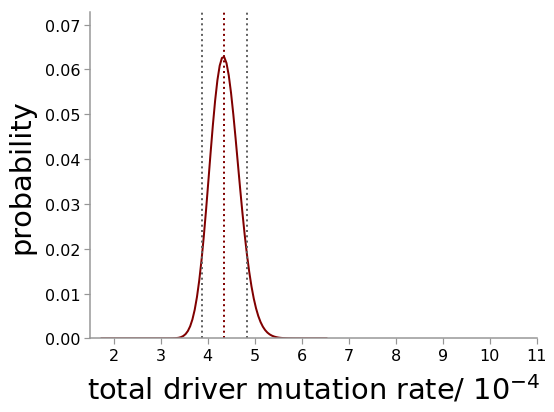

In [139]:
#Plot the distributions
plt.close('all')
f, ax1= plt.subplots(1, 1, sharey=True, sharex = True, figsize=(8, 6))

mut_list=np.linspace(best_fit_u*0.4, best_fit_u*1.5, 100)
print('lower:', best_fit_u*0.4)
print('upper:', best_fit_u*1.5)

#MLE for increased mutation rate

squared_distance_HH = np.array([squared_distance_calculation_HH_cumulative_optimize_faster([mut], Bolton_VAF_info_syn_cumulative, Boltontotal, Bolton_synonymous_mu, Bolton_dev_per_doubling_synonymous_mu_LeeSix, N_tau, list_of_control_ages_Bolton,\
                                      lmin_Bolton, lmax, Bolton_synonymous_bins_above_lmin, s_tolerance, s_max_inferred) for mut in mut_list])

# Plot the density map using nearest-neighbor interpolation
logProbs_HH = (-squared_distance_HH)
max_x= np.unravel_index(np.argmax(logProbs_HH), logProbs_HH.shape)
z_max = logProbs_HH[max_x]
z1_HH = np.exp(logProbs_HH-(z_max))
z1_HH_normalized= z1_HH/sum(z1_HH)
print('z1_HH_normalized normalized to:', sum(z1_HH_normalized))


mg_mut = np.meshgrid(mut_list)
ax1, min_s, max_s = confidence_interval_95_HH(mut_list, z1_HH_normalized, 'maroon')


# x_major_ticks=[ 1*10**-3, 1.2*10**-3, 1.4*10**-3, 1.6*10**-3, 1.8*10**-3, 2*10**-3]
# x_major_tick_labels=[ '1.0', '1.2','1.4', '1.6', '1.8', '2']
x_major_ticks=[ 2*10**-4, 3*10**-4, 4*10**-4, 5*10**-4, 6*10**-4, 7*10**-4, 8*10**-4, 9*10**-4, 10*10**-4, 11*10**-4]
x_major_tick_labels=[ '2','3','4', '5','6', '7', '8','9', '10', '11']
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels)
# ax1.set_xlim(1*10**-3, 2*10**-3)

# Axis labels
scale = 1.2
ax1.set_xlabel('total driver mutation rate/ $10^{-4}$', fontsize = 24*scale, labelpad = 10, fontweight = 'medium')
ax1.set_ylabel('probability', fontsize = 24*scale, labelpad = 10, fontweight = 'medium')

ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)


# plt.savefig('Reed_model_pfree_CI_interval_HH_healthy_blood_468_genes.pdf', bbox_inches='tight')
# plt.savefig('Reed_model_p2_CI_interval_HH_healthy_blood_468_genes.pdf', bbox_inches='tight')
# plt.savefig('Reed_model_p3_CI_interval_HH_healthy_blood_468_genes.pdf', bbox_inches='tight')
# plt.savefig('Reed_model_p4_CI_interval_HH_healthy_blood_468_genes.pdf', bbox_inches='tight')

plt.show()






In [140]:
# based on output from MLE plot
lower_ratio = (  0.00038666666666666634- Bolton_468panel_functional_non_syn_mu)/Bolton_468panel_functional_non_syn_mu 
upper_ratio = ( 0.0004833333333333329   - Bolton_468panel_functional_non_syn_mu)/Bolton_468panel_functional_non_syn_mu 


print('upper ratio:', upper_ratio)
print('lower ratio:', lower_ratio)
print('Bolton_468panel_functional_non_syn_mu:', Bolton_468panel_functional_non_syn_mu)

upper ratio: 19.173873288147963
lower ratio: 15.139098630518372
Bolton_468panel_functional_non_syn_mu: 2.3958380546451064e-05


ratio_lower: 15.139098630518372
ratio_upper: 19.173873288147963


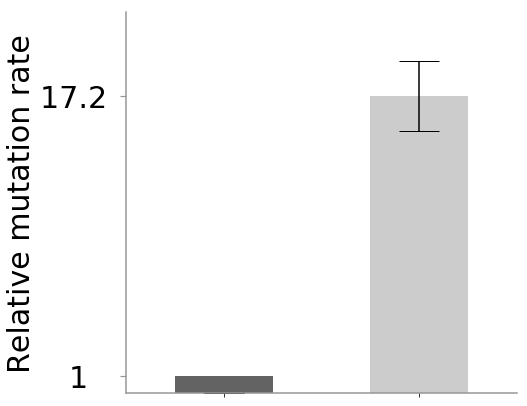

In [141]:
import numpy as np
import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)
purple_portion = (0, unknown_ratio)
gold_portion = (1, 0)
error=[[0, unknown_ratio-lower_ratio], [0, upper_ratio - unknown_ratio]]
print('ratio_lower:', lower_ratio)
print('ratio_upper:', upper_ratio)

p1=ax.bar(np.arange(2), purple_portion, yerr=error, capsize=20 ,width=0.5, color=grey2)
# p1=ax.bar(np.arange(2), purple_portion, width=0.5, color='purple')
p2=ax.bar(np.arange(2), gold_portion, bottom=purple_portion, width=0.5, color=grey4)
plt.xticks(np.arange(2), ('',''))

y_major_ticks=[1,unknown_ratio]
y_major_tick_labels=['1   ',  '%s ' % round(unknown_ratio, 1)]
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize=30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)
ax.set_ylabel('Relative mutation rate', fontsize=30)

ax.set_ylim(0,22)
ax.set_xlim(-0.5, 1.5)

ax.xaxis.set_tick_params(False)
#Only show the required axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

    
# plt.savefig('Reed_model_DFE_pfree_MLE_bar_chart_468_genes.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_DFE_p2_MLE_bar_chart_468_genes.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_DFE_p3_MLE_bar_chart_468_genes.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_DFE_p4_MLE_bar_chart_468_genes.pdf',bbox_inches='tight')



# Plot VAF spectrum

In [27]:

def plot_log_hist_data_for_plot_solid_smaller_greyout(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1

def plot_log_hist_data_for_plot_solid_smaller(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1


In [38]:
Bolton_468panel_functional_non_syn_mu

3.522311217465192e-05

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: RuntimeWarning: divide by zero encountered in log


hitchhiker_y_fixed_Bolton based on all 590 ages [5.462581820838892, 5.346577672340086, 5.230042339152872, 5.112952417579989, 4.9952874373792024, 4.877029696908459, 4.758163809080595, 4.638675979856064, 4.518553056157673, 4.397781403799907, 4.2763456983070345, 4.154227723379715, 4.031405269936374, 3.9078512116966677, 3.78353280216434, 3.658411198951354, 3.5324411816623527, 3.405570996138181, 3.2777422358921244, 3.148889662540477, 3.0189408700874143, 2.887815706882209, 2.7554253808173286, 2.6216711804110373, 2.486442742092543, 2.3496157807263893, 2.2110491616090706, 2.07058116870737, 1.9280243787189815, 1.7831602073133703, 1.6357318120020825, 1.4854293053727767, 1.331879437622846, 1.1746256146708636, 1.0131000206505643, 0.8465862911731789, 0.6741646171402081, 0.4946305031594691, 0.30637066836785276, 0.10716677640534625, -0.1061278379455981, -0.33814707778351766, -0.5960372067952615, -0.8914798775527968, -1.2450789115693788, -1.6971454824700316, -2.339386263250381, -3.4379328083911935, -6

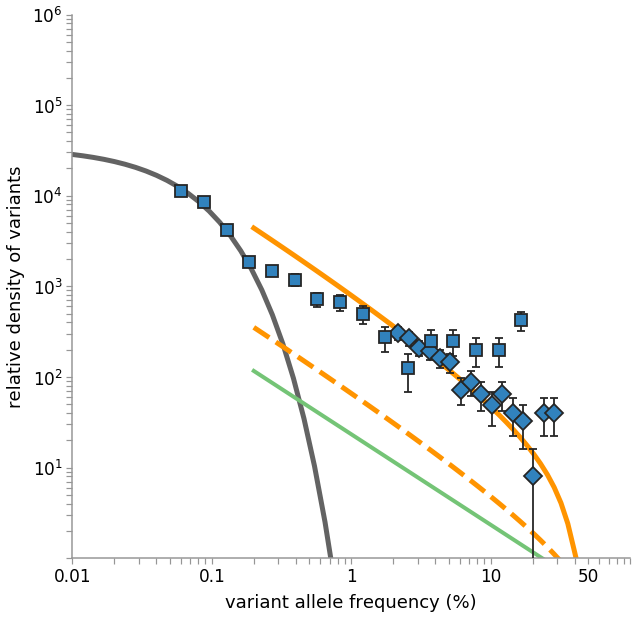

In [137]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

import timeit
start = timeit.default_timer()

Boltonmarker='D'
Razavimarker='s'
neutralcolor=c3

m_size = 14
Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9

def SuperScriptinate(number):
    return number.replace('0','⁰').replace('1','¹').replace('2','²').replace('3','³').replace('4','⁴').replace('5','⁵').replace('6','⁶').replace('7','⁷').replace('8','⁸').replace('9','⁹').replace('-','⁻')

def sci_notation(number, sig_fig):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a,b = ret_string.split("e")
    b = int(b)         # removed leading "+" and strips leading zeros too.
    return a + "x10^" + SuperScriptinate(str(b))



x=np.linspace(np.log(10**-4), np.log(0.4999), 50)
x_passenger=np.linspace(np.log(phi), np.log(0.4999), 50)


inferred_syn_rate_from_drift_selection=8.1*10**-4

# neutral drift prediction is based on Razavi data
neutral_single_y_Razavi=[logProbtheory_actual_ages_drift(l, N_tau_drift, list_of_control_ages_Razavi)+np.log(inferred_syn_rate_from_drift_selection/Razavi_synonymous_mu) for l in x]
ax1.plot(x, neutral_single_y_Razavi, zorder=0, c = grey4, lw = 5, label= 'neutral drift')

# passenger prediction is based on Bolton data

s_max_inferred = 1 # same as setting to 10 in log convex DFE's

hitchhiker_y_fixed_Bolton=[logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, Bolton_468panel_functional_non_syn_mu], N_tau, s_tolerance, s_max_inferred, list_of_control_ages_Bolton) for l in x_passenger]
print('hitchhiker_y_fixed_Bolton based on all 590 ages', hitchhiker_y_fixed_Bolton)
print('s_max_inferred', s_max_inferred)

stop = timeit.default_timer()

print('Time: ', stop - start)

print('best_fit_u', best_fit_u)
print('p=',p_inferred)

hitchhiker_y_best_fit_Bolton=[logProbtheory_actual_ages_hitch(l, [p_inferred, q_inferred, best_fit_u], N_tau, s_tolerance, s_max_inferred, list_of_control_ages_Bolton) for l in x_passenger]
print('s_max_inferred', s_max_inferred)
print('hitchhiker_y_best_fit_Bolton based on all 590 ages', hitchhiker_y_best_fit_Bolton)

early_developmentals_y=[logProbtheory_ages_dev(l, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu) for l in x_passenger]
ax1.plot(x_passenger, early_developmentals_y, c = green3, lw = 4, label= 'early developmental')

early_developmentals_and_hitchhiker_fixed = [np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_fixed_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_fixed, c = c3, lw = 5, linestyle='--',  label= 'dev. mutations + \nhitchhikers with known drivers (Coombs)')

early_developmentals_and_hitchhiker_best_fit=[np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_best_fit_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_best_fit, c = c3, lw = 5, label= 'dev. mutations + \nhitchhikers with all drivers')

stop = timeit.default_timer()

print('Time: ', stop - start)


#Synoymous variants (all genes)
Bolton_nonsynonymous_bins=Bolton_synonymous_bins
plot_log_hist_data_for_plot_solid_smaller(Bolton_synonymous_trimmed_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins, \
                            '', Boltonmarker, Boltonmarkersize, blue4)

plot_log_hist_data_for_plot_solid_smaller(Razavi_synonymous_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins, \
                            '', Razavimarker, Razavimarkersize, blue4)

list_top20variants_Bolton = [0.052, 0.2684, 0.02839, 0.04615, 0.06084, 0.36599, 0.40865, 0.34625,\
 0.05667, 0.20398, 0.0297, 0.02117, 0.04642, 0.03618, 0.36331, 0.02046,\
 0.19917, 0.32262, 0.02713, 0.02228, 0.6264, 0.05882, 0.02587, 0.02096,\
 0.08148, 0.20661, 0.0917, 0.08434, 0.04608]
# Bolton_top20variant_mu =276*10**-9

# Bolton_nonsynonymous_bins = Bolton_synonymous_bins
# plot_log_hist_data_for_plot_solid_smaller_greyout(list_top20variants_Bolton, Boltontotal, Bolton_top20variant_mu, Bolton_nonsynonymous_bins, \
#                         '', Boltonmarker, Boltonmarkersize, grey3)


# Plotting synonymous VAF spectra
# Bolton_nonsynonymous_bins = Bolton_synonymous_bins
# plot_log_hist_data_for_plot_solid_smaller_greyout(list_top20variants_Bolton, Boltontotal, Bolton_top20variant_mu, Bolton_nonsynonymous_bins, \
#                         '', Boltonmarker, Boltonmarkersize, grey3)



# beneficial_rescaled_y = []
# x_ben=np.linspace(np.log(10**-4),np.log(0.4999999),100)
# for l in x_ben:
#     linear_densities_summed_top20variants = 0
# #  top20variants_fitness is defined at the end of the notebook under the 'Top 20 variants' subheading
#     for variant, s in top20variants_fitness.items():
        
#         variant_mut_rate = top20variants_mut_rate[variant]
#         log_tmp = logProbtheory_actual_ages_beneficial(l, N_tau, s, list_of_control_ages_Bolton)+\
#         np.log(variant_mut_rate/Bolton_top20variant_mu) #for normalization according to mutation rates of the particular variant
#         linear_densities_summed_top20variants = linear_densities_summed_top20variants + np.exp(log_tmp)
        
#     log_densities_summed_top20variants = np.log(linear_densities_summed_top20variants)
#     beneficial_rescaled_y.append(log_densities_summed_top20variants)
# ax1.plot(x_ben, beneficial_rescaled_y, c = grey3, lw = 4)

# plt.savefig('Reed_model_S9_main_fig_All468gene_DFE_pfree_s_cutoff_3pt5percent.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_S10_main_fig_All468gene_DFE_p2_s_cutoff_3pt5percent.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_S11_main_fig_All468gene_DFE_p3_s_cutoff_3pt5percent.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_All468gene_DFE_p4_s_cutoff_3pt5percent.pdf',bbox_inches='tight')
# plt.savefig('Reed_model_S9_main_fig_All468gene_DFE_pfree_s_cutoff_3pt5percent_withtop20var.pdf',bbox_inches='tight')

plt.show()


In [ ]:
# stored results: p free

hitchhiker_y_fixed_Bolton = [5.482200893873411, 5.363943586283965, 5.24495919589547, 5.125228444001719, 5.00473810598576, 4.8834808352567025, 4.761454527484676, 4.638661253393687, 4.515105811893102, 4.390793995897507, 4.265730702377524, 4.139918039771716, 4.013353597189343, 3.886029001341456, 3.7579288568994516, 3.629030093972179, 3.499301684959434, 3.368704636521831, 3.2371921248967674, 3.1047096277649313, 2.9711949113871907, 2.836577751397562, 2.700779290995226, 2.563710961660062, 2.4252729047491215, 2.285351822160735, 2.1438181352507426, 2.0005206573588845, 1.8552887870259933, 1.7079170797659933, 1.5581624014283293, 1.4057327101376655, 1.2502737953916196, 1.0913508481978782, 0.9284215128527966, 0.7607996578361648, 0.5876022765470764, 0.40767089722260064, 0.21945146683050729, 0.02080436298703256, -0.1913085503633204, -0.421364951499045, -0.6762740490590208, -0.9673333870701608, -1.3144679203765461, -1.7566367559320804, -2.3823337306220833, -3.447485502049802, -6.148002242738353, -738.0667521318043]


hitchhiker_y_best_fit_Bolton = [8.444886387259274, 8.326629079669827, 8.207644689281333, 8.08791393738758, 7.9674235993716245, 7.846166328642566, 7.724140020870537, 7.60134674677955, 7.477791305278965, 7.3534794892833695, 7.228416195763386, 7.102603533157579, 6.976039090575204, 6.848714494727319, 6.720614350285314, 6.591715587358043, 6.461987178345294, 6.331390129907225, 6.199877618282421, 6.067395121150579, 5.933880404772778, 5.79926324478308, 5.663464784381039, 5.526396455045969, 5.387958398135079, 5.248037315547084, 5.106503628636885, 4.9632061507608505, 4.817974280426586, 4.6706025731687175, 4.520847894834154, 4.368418203540934, 4.212959288796615, 4.054036341603585, 3.891107006271704, 3.7234851512624934, 3.5502877699737074, 3.370356390673203, 3.182136960292378, 2.9834898564953996, 2.771376943165915, 2.5413205379604054, 2.2864114397302036, 1.9953521067339628, 1.6482175734503817, 1.206048738258421, 0.5803517737853015, -0.4847999657458922, -3.1853166567526436, -735.5018027743428]

In [33]:
# stored result: p = 2

hitchhiker_y_fixed_Bolton = [5.639259452112355, 5.516789301358345, 5.393267335071413, 5.268689719054942, 5.143065396859051, 5.016415864590448, 4.888774082063889, 4.7601825526512975, 4.630690643800979, 4.500351310125708, 4.369217462128213, 4.2373382899520085, 4.104755871634142, 3.971502365222568, 3.8375980007555057, 3.7030499672924426, 3.5678521551459985, 3.4319855919082296, 3.295419316582973, 3.1581114649973907, 3.0200101521841023, 2.8810541110584205, 2.741172784107948, 2.6002858082587696, 2.4583019409354283, 2.3151159583596694, 2.170599129175409, 2.0246390740113163, 1.8770596192448232, 1.72766629779002, 1.5762376022214906, 1.4224984272155934, 1.2661177144117235, 1.106686523734432, 0.9436949010194893, 0.7764959595871066, 0.6042561169580686, 0.4258802329157483, 0.23989750359994308, 0.04428085052461574, -0.16385093758147326, -0.38874686119092444, -0.6369681962342699, -0.9192456259847083, -1.2545014713632627, -1.6797010848102574, -2.2786265423825864, -3.292418888033402, -5.834234281044373, -505.2815431875483]

hitchhiker_y_best_fit_Bolton = [8.57113807922803, 8.448667928474023, 8.325145962187092, 8.200568346170616, 8.074944023974727, 7.948294491706124, 7.820652709179569, 7.692061179766969, 7.5625692709166525, 7.432229937241385, 7.301096089243875, 7.16921691706761, 7.036634498749745, 6.903380992338375, 6.7694766278715734, 6.634928594408537, 6.499730782262306, 6.36386421902562, 6.227297943700757, 6.089990092115379, 5.9518887793021475, 5.812932738176445, 5.673051411225866, 5.532164435376383, 5.390180568053065, 5.2469945854781175, 5.102477756295386, 4.956517701131169, 4.808938246365555, 4.659544924910933, 4.50811622934377, 4.354377054338171, 4.197996341538172, 4.038565150865091, 3.8755735281670107, 3.7083745958624412, 3.5361347441155435, 3.3577588600740387, 3.17177615240119, 2.9761595015342697, 2.7680277177764854, 2.5431317678358094, 2.294910433057012, 2.0126329929643236, 1.6773771458028555, 1.2521775293066317, 0.653252088971705, -0.3605402874892627, -2.902355650637403, -502.34966456043264]



In [ ]:
# stored result: p = 3

hitchhiker_y_fixed_Bolton = [5.519140984893624, 5.401178501896531, 5.282516293133736, 5.163134906519753, 5.043020439042297, 4.922164884778177, 4.800564736519838, 4.678220616001836, 4.555135222608474, 4.431312480838405, 4.306755204627725, 4.181463431038796, 4.055432771748489, 3.928653043218573, 3.8011072573045164, 3.672770996167956, 3.543612133288014, 3.413590809635812, 3.2826595387332653, 3.1507633004806017, 3.017839488915338, 2.8838175973773694, 2.748618548447203, 2.6121535951809, 2.4743227319067964, 2.3350125416261776, 2.1940933671263063, 2.0514147526696194, 1.9068040127265753, 1.7600573002755806, 1.6109315394566945, 1.4591347343712566, 1.3043130182174558, 1.1460320348138278, 0.9837500830422821, 0.8167819028944867, 0.6442456529528078, 0.4649844092021753, 0.27744618885036854, 0.07949415980250316, -0.13190597741013774, -0.3612264895763502, -0.6153686773205858, -0.9056179880443774, -1.2518796915217374, -1.693078249596413, -2.3176402557413316, -3.381350422323605, -6.08000740344472, -float('inf')]

hitchhiker_y_best_fit_Bolton = [8.429621883561692, 8.311659400564599, 8.192997191801803, 8.073615805187817, 7.9535013377103665, 7.832645783446245, 7.711045635187906, 7.588701514669906, 7.465616121276542, 7.341793379506473, 7.217236103295793, 7.091944329706866, 6.965913670416555, 6.83913394188664, 6.7115881559725805, 6.583251894836024, 6.4540930319560825, 6.324071708303866, 6.1931404374012455, 6.061244199148582, 5.928320387583058, 5.794298496044973, 5.65909944711506, 5.5226344938492655, 5.384803630575299, 5.2454934402945534, 5.104574265794685, 4.961895651353274, 4.817284911409689, 4.67053819895763, 4.52141243814442, 4.369615633057804, 4.214793916903747, 4.056512933501646, 3.8942309817365315, 3.7272628016068015, 3.55472655166903, 3.3754653091603237, 3.187927088933629, 2.989975060081121, 2.7785749230806513, 2.5492544070316527, 2.2951122166934774, 2.0048629108447478, 1.6586012075819396, 1.2174026497573691, 0.5928406445953399, -0.47086951622531487, -3.169526439941274, -float('inf')]


In [ ]:
# stored result: p=4

hitchhiker_y_fixed_Bolton = [5.462581820838892, 5.346577672340086, 5.230042339152872, 5.112952417579989, 4.9952874373792024, 4.877029696908459, 4.758163809080595, 4.638675979856064, 4.518553056157673, 4.397781403799907, 4.2763456983070345, 4.154227723379715, 4.031405269936374, 3.9078512116966677, 3.78353280216434, 3.658411198951354, 3.5324411816623527, 3.405570996138181, 3.2777422358921244, 3.148889662540477, 3.0189408700874143, 2.887815706882209, 2.7554253808173286, 2.6216711804110373, 2.486442742092543, 2.3496157807263893, 2.2110491616090706, 2.07058116870737, 1.9280243787189815, 1.7831602073133703, 1.6357318120020825, 1.4854293053727767, 1.331879437622846, 1.1746256146708636, 1.0131000206505643, 0.8465862911731789, 0.6741646171402081, 0.4946305031594691, 0.30637066836785276, 0.10716677640534625, -0.1061278379455981, -0.33814707778351766, -0.5960372067952615, -0.8914798775527968, -1.2450789115693788, -1.6971454824700316, -2.339386263250381, -3.4379328083911935, -6.2474478267255416, -float('inf')]

hitchhiker_y_best_fit_Bolton = [8.361609670845633, 8.245605522346827, 8.129070189159615, 8.01198026758673, 7.8943152873859415, 7.7760575469152, 7.657191659087335, 7.5377038298628065, 7.417580906164414, 7.296809253806648, 7.175373548313776, 7.053255573386455, 6.930433119943116, 6.806879061703407, 6.682560652171082, 6.557439048958096, 6.431469031669093, 6.304598846144921, 6.176770085898864, 6.047917512547164, 5.917968720094139, 5.786843556888829, 5.654453230823835, 5.520699030417105, 5.385470592098912, 5.248643630741129, 5.110077011624777, 4.969609018724584, 4.82705222873501, 4.682188057332077, 4.534759662020756, 4.384457155417783, 4.23090728767847, 4.073653464725134, 3.91212787071984, 3.7456141412688506, 3.5731924672595237, 3.3936583532654545, 3.205398518593591, 3.006194626560298, 2.79290001224553, 2.5608807583875155, 2.3029906270642386, 2.0075479529881806, 1.6539489139562438, 1.201882334528792, 0.5596415371164587, -0.5389049478575656, -3.348419884304583, -float('inf')]



### Top 20 variants 

In [30]:
top20variants_fitness = {}
top20variants_mut_rate = {}

top20variants_fitness['SRSF2 P95R'] = 23.1/100
top20variants_fitness['SF3B1 K700E'] = 22.9/100
top20variants_fitness['DNMT3A R882C'] = 18.7/100
top20variants_fitness['SRSF2 P95H'] = 16.1/100
top20variants_fitness['DNMT3A R729W'] = 16.0/100
top20variants_fitness['DNMT3A R326C'] = 15.8/100
top20variants_fitness['SF3B1 K666N'] = 15.4/100
top20variants_fitness['SRSF2 P95L'] = 15.1/100
top20variants_fitness['DNMT3A R320*'] = 15/100
top20variants_fitness['GNB1 K57E'] = 15/100
top20variants_fitness['DNMT3A R882H'] = 14.8/100
top20variants_fitness['JAK2 V617F'] = 14.6/100
top20variants_fitness['IDH2 R140Q'] = 14.5/100
top20variants_fitness['DNMT3A R736H'] = 14.1/100
top20variants_fitness['DNMT3A Y735C'] = 12.9/100
top20variants_fitness['DNMT3A R736C'] = 12.3/100
top20variants_fitness['DNMT3A W860R'] = 12.1/100
top20variants_fitness['DNMT3A R771*'] = 12/100
top20variants_fitness['DNMT3A R598*'] = 11.9/100
top20variants_fitness['DNMT3A P904L'] = 11.2/100

top20variants_mut_rate['SRSF2 P95R'] = 2.5*10**-9
top20variants_mut_rate['SF3B1 K700E'] = 3.5*10**-9
top20variants_mut_rate['DNMT3A R882C'] = 5.9*10**-9
top20variants_mut_rate['SRSF2 P95H'] = 7.5*10**-9
top20variants_mut_rate['DNMT3A R729W'] = 14.9*10**-9
top20variants_mut_rate['DNMT3A R326C'] = 11.8*10**-9
top20variants_mut_rate['SF3B1 K666N'] = 4.7*10**-9
top20variants_mut_rate['SRSF2 P95L'] = 6.8*10**-9
top20variants_mut_rate['DNMT3A R320*'] = 8.5*10**-9
top20variants_mut_rate['GNB1 K57E'] = 7.8*10**-9
top20variants_mut_rate['DNMT3A R882H'] = 18.8*10**-9
top20variants_mut_rate['JAK2 V617F'] = 13.6*10**-9
top20variants_mut_rate['IDH2 R140Q'] = 5.2*10**-9
top20variants_mut_rate['DNMT3A R736H'] = 17.3*10**-9
top20variants_mut_rate['DNMT3A Y735C'] = 13.9*10**-9 
top20variants_mut_rate['DNMT3A R736C'] = 12.9*10**-9
top20variants_mut_rate['DNMT3A W860R'] = 39.6*10**-9
top20variants_mut_rate['DNMT3A R771*'] = 13.1*10**-9
top20variants_mut_rate['DNMT3A R598*'] = 22.8*10**-9
top20variants_mut_rate['DNMT3A P904L'] = 45.2*10**-9

Bolton_top20variant_mu = 0
for variant, mut_rate in top20variants_mut_rate.items():
    Bolton_top20variant_mu = Bolton_top20variant_mu + mut_rate
print('Bolton_top20variant_mu',Bolton_top20variant_mu)

Bolton_top20variant_mu 2.763e-07


In [85]:
def Predicted_beneficial_with_cutoff(l, N_tau, s, t):
    return N_tau*np.exp(-2*N_tau/((np.exp(s*t)-1)/s)*(np.exp(l)/(1-2*np.exp(l))))

def logProbtheory_actual_ages_beneficial(l, N_tau, s, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + Predicted_beneficial_with_cutoff(l, N_tau, s, age)/len(list_of_control_ages)
    
    
    return np.log(total_density)

s_vector_DNMT3A [0.1125, 0.1375, 0.1625, 0.1875, 0.21250000000000002, 0.23500000000000001] mut_rate_vector_DNMT3A [5.344e-06, 2.0000000000000003e-06, 1.408e-06, 2.3600000000000002e-07, 0, 0]
s_vector_SRSF2 [0.1125, 0.1375, 0.1625, 0.1875, 0.21250000000000002, 0.23500000000000001] mut_rate_vector_SRSF2 [0, 0, 5.72e-07, 0, 0, 1e-07]
s_vector_SF3B1 [0.1125, 0.1375, 0.1625, 0.1875, 0.21250000000000002, 0.23500000000000001] mut_rate_vector_SF3B1 [0, 0, 1.8800000000000002e-07, 0, 0, 1.4e-07]
all #969696
DNMT3A_color #31a354
SRSF2_color #54278f
SF3B1_color #fcae91


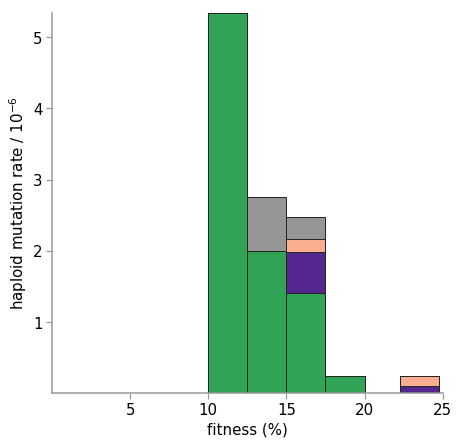

In [91]:
import numpy as np
import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)
bar_width=0.025
shift = bar_width/2

mut_rate_vector=[]
s_vector=[]
noralized_mut_bin_1  = 0
noralized_mut_bin_2 = 0
noralized_mut_bin_3  = 0
noralized_mut_bin_4  = 0
noralized_mut_bin_5  = 0
noralized_mut_bin_6  = 0

for variant, mut_rate in top20variants_mut_rate.items():
    fitness = top20variants_fitness[variant]
    mut_rate_vector.append(mut_rate)
    s_vector.append(fitness)
    noralized_mut = mut_rate/bar_width
    if 0.1 <= fitness <0.125:
        noralized_mut_bin_1 = noralized_mut_bin_1 + noralized_mut
    if 0.125 <= fitness <0.15:
        noralized_mut_bin_2 = noralized_mut_bin_2 + noralized_mut
    if 0.15 <= fitness <0.175:
        noralized_mut_bin_3 = noralized_mut_bin_3 + noralized_mut
    if 0.175 <= fitness <0.2:
        noralized_mut_bin_4 = noralized_mut_bin_4 + noralized_mut
    if 0.2 <= fitness <0.225:
        noralized_mut_bin_5 = noralized_mut_bin_5 + noralized_mut
    if 0.225 <= fitness <0.25:
        noralized_mut_bin_6 = noralized_mut_bin_6 + noralized_mut

s_vector=[0.1+shift, 0.125+shift, 0.15+shift, 0.175+shift, 0.2+shift, 0.2225+shift ]
mut_rate_vector = [noralized_mut_bin_1,noralized_mut_bin_2,noralized_mut_bin_3,noralized_mut_bin_4,noralized_mut_bin_5,  noralized_mut_bin_6]
            
        

mut_rate_vector_DNMT3A=[]
s_vector_DNMT3A=[]
noralized_mut_bin_1  = 0
noralized_mut_bin_2 = 0
noralized_mut_bin_3  = 0
noralized_mut_bin_4  = 0
noralized_mut_bin_5  = 0
noralized_mut_bin_6  = 0
for variant, mut_rate in top20variants_mut_rate.items():
    if 'DNMT3A' in variant:
        fitness = top20variants_fitness[variant]
#         mut_rate_vector_DNMT3A.append(mut_rate)
#         s_vector_DNMT3A.append(fitness)
        noralized_mut = mut_rate/bar_width
        if 0.1 <= fitness <0.125:
            noralized_mut_bin_1 = noralized_mut_bin_1 + noralized_mut
        if 0.125 <= fitness <0.15:
            noralized_mut_bin_2 = noralized_mut_bin_2 + noralized_mut
        if 0.15 <= fitness <0.175:
            noralized_mut_bin_3 = noralized_mut_bin_3 + noralized_mut
        if 0.175 <= fitness <0.2:
            noralized_mut_bin_4 = noralized_mut_bin_4 + noralized_mut
        if 0.2 <= fitness <0.225:
            noralized_mut_bin_5 = noralized_mut_bin_5 + noralized_mut
        if 0.225 <= fitness <0.25:
            noralized_mut_bin_6 = noralized_mut_bin_6 + noralized_mut

s_vector_DNMT3A=[0.1+shift, 0.125+shift, 0.15+shift, 0.175+shift, 0.2+shift, 0.2225+shift  ]
mut_rate_vector_DNMT3A = [noralized_mut_bin_1,noralized_mut_bin_2,noralized_mut_bin_3,noralized_mut_bin_4,noralized_mut_bin_5,  noralized_mut_bin_6]
print('s_vector_DNMT3A',s_vector_DNMT3A,'mut_rate_vector_DNMT3A',mut_rate_vector_DNMT3A)           
        
        
mut_rate_vector_SRSF2=[]
s_vector_SRSF2=[]
noralized_mut_bin_1  = 0
noralized_mut_bin_2 = 0
noralized_mut_bin_3  = 0
noralized_mut_bin_4  = 0
noralized_mut_bin_5  = 0
noralized_mut_bin_6  = 0
for variant, mut_rate in top20variants_mut_rate.items():
    if 'SRSF2' in variant:
        fitness = top20variants_fitness[variant]
#         mut_rate_vector_SRSF2.append(mut_rate)
#         s_vector_SRSF2.append(fitness)
        noralized_mut = mut_rate/bar_width
        if 0.1 <= fitness <0.125:
            noralized_mut_bin_1 = noralized_mut_bin_1 + noralized_mut
        if 0.125 <= fitness <0.15:
            noralized_mut_bin_2 = noralized_mut_bin_2 + noralized_mut
        if 0.15 <= fitness <0.175:
            noralized_mut_bin_3 = noralized_mut_bin_3 + noralized_mut
        if 0.175 <= fitness <0.2:
            noralized_mut_bin_4 = noralized_mut_bin_4 + noralized_mut
        if 0.2 <= fitness <0.225:
            noralized_mut_bin_5 = noralized_mut_bin_5 + noralized_mut
        if 0.225 <= fitness <0.25:
            noralized_mut_bin_6 = noralized_mut_bin_6 + noralized_mut

s_vector_SRSF2=[0.1+shift, 0.125+shift, 0.15+shift, 0.175+shift, 0.2+shift, 0.2225+shift ]
mut_rate_vector_SRSF2 = [noralized_mut_bin_1,noralized_mut_bin_2,noralized_mut_bin_3,noralized_mut_bin_4,noralized_mut_bin_5,  noralized_mut_bin_6]
print('s_vector_SRSF2', s_vector_SRSF2, 'mut_rate_vector_SRSF2', mut_rate_vector_SRSF2) 

mut_rate_vector_DNMT3A_SRSF2 = []
for j in range(len(mut_rate_vector_SRSF2)):
    mut_1 = mut_rate_vector_SRSF2[j]
    mut_2 = mut_rate_vector_DNMT3A[j]
    mut_rate_vector_DNMT3A_SRSF2.append(mut_1+mut_2)
        
mut_rate_vector_SF3B1=[]
s_vector_SF3B1=[]
noralized_mut_bin_1  = 0
noralized_mut_bin_2 = 0
noralized_mut_bin_3  = 0
noralized_mut_bin_4  = 0
noralized_mut_bin_5  = 0
noralized_mut_bin_6  = 0
for variant, mut_rate in top20variants_mut_rate.items():
    if 'SF3B1' in variant:
        fitness = top20variants_fitness[variant]
#         mut_rate_vector_SF3B1.append(mut_rate)
#         s_vector_SF3B1.append(fitness)
        noralized_mut = mut_rate/bar_width
        if 0.1 <= fitness <0.125:
            noralized_mut_bin_1 = noralized_mut_bin_1 + noralized_mut
        if 0.125 <= fitness <0.15:
            noralized_mut_bin_2 = noralized_mut_bin_2 + noralized_mut
        if 0.15 <= fitness <0.175:
            noralized_mut_bin_3 = noralized_mut_bin_3 + noralized_mut
        if 0.175 <= fitness <0.2:
            noralized_mut_bin_4 = noralized_mut_bin_4 + noralized_mut
        if 0.2 <= fitness <0.225:
            noralized_mut_bin_5 = noralized_mut_bin_5 + noralized_mut
        if 0.225 <= fitness <0.25:
            noralized_mut_bin_6 = noralized_mut_bin_6 + noralized_mut


s_vector_SF3B1=[0.1+shift, 0.125+shift, 0.15+shift, 0.175+shift, 0.2+shift, 0.2225+shift ]
mut_rate_vector_SF3B1 = [noralized_mut_bin_1,noralized_mut_bin_2,noralized_mut_bin_3,noralized_mut_bin_4,noralized_mut_bin_5,  noralized_mut_bin_6]
print('s_vector_SF3B1',s_vector_SF3B1, 'mut_rate_vector_SF3B1',mut_rate_vector_SF3B1)     
        
print('all', grey3)
DNMT3A_color=green4
print('DNMT3A_color', green4)
SRSF2_color = purple5 
print('SRSF2_color',purple5)
SF3B1_color = red2
print('SF3B1_color', red2)


p1=ax.bar(s_vector, mut_rate_vector, capsize=20 ,width=bar_width, color = grey3, edgecolor=grey5)
p2=ax.bar(s_vector_DNMT3A, mut_rate_vector_DNMT3A, capsize=20 ,width=bar_width, color = DNMT3A_color, edgecolor=grey5)
p3=ax.bar(s_vector_SRSF2, mut_rate_vector_SRSF2, bottom=mut_rate_vector_DNMT3A, capsize=20 ,width=bar_width, color = SRSF2_color, edgecolor=grey5)
p4=ax.bar(s_vector_SF3B1, mut_rate_vector_SF3B1, bottom=mut_rate_vector_DNMT3A_SRSF2,\
          capsize=20 ,width=bar_width, color = SF3B1_color, edgecolor=grey5)

# plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Total', 'DNMT3A', 'SRSF2', 'SF3B1'))

y_major_ticks=[10**-6, 2*10**-6, 3*10**-6, 4*10**-6, 5*10**-6]
y_major_tick_labels=['1', '2', '3', '4', '5']
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize=15)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)
ax.set_ylabel('haploid mutation rate / $10^{-6}$', fontsize=15)

x_major_ticks=[0.05,0.1,0.15,0.2,0.25]
x_major_tick_labels=['5','10','15','20','25']
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize=15)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)
ax.set_xlabel('fitness (%)', fontsize=15)
ax.set_xlim(0, 0.25)

#Only show the required axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

    
# plt.savefig('Top20_variants_fitness_landscape_stacked_plot.pdf',bbox_inches='tight')


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars


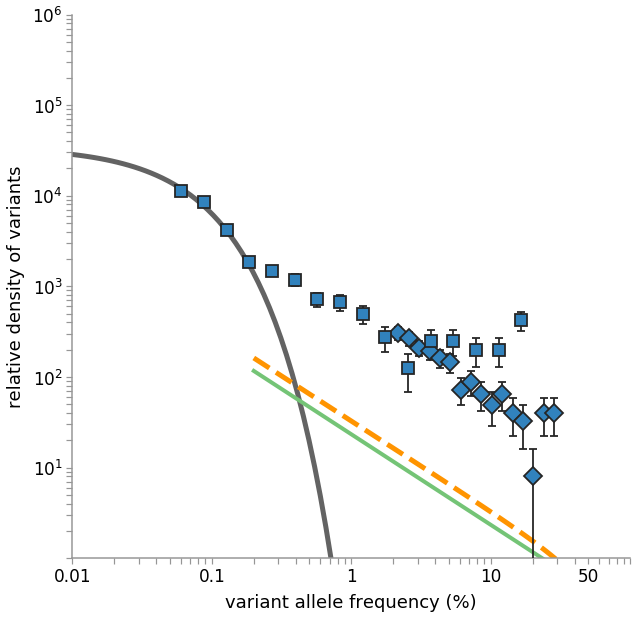

In [31]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}


Boltonmarker='D'
Razavimarker='s'
neutralcolor=c3

m_size = 14
Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9

def SuperScriptinate(number):
    return number.replace('0','⁰').replace('1','¹').replace('2','²').replace('3','³').replace('4','⁴').replace('5','⁵').replace('6','⁶').replace('7','⁷').replace('8','⁸').replace('9','⁹').replace('-','⁻')

def sci_notation(number, sig_fig):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a,b = ret_string.split("e")
    b = int(b)         # removed leading "+" and strips leading zeros too.
    return a + "x10^" + SuperScriptinate(str(b))


x=np.linspace(-10, np.log(1), 100)
x=np.linspace(np.log(10**-4), np.log(1), 100)
x_passenger=np.linspace(np.log(phi), np.log(1), 100)


inferred_syn_rate_from_drift_selection=8.1*10**-4

# neutral drift prediction is based on Razavi data
neutral_single_y_Razavi=[logProbtheory_actual_ages_drift(l, N_tau_drift, list_of_control_ages_Razavi)+np.log(inferred_syn_rate_from_drift_selection/Razavi_synonymous_mu) for l in x]
ax1.plot(x, neutral_single_y_Razavi, zorder=0, c = grey4, lw = 5, label= 'neutral drift')


hitchhiker_y_top20variants_Bolton = []
for l in x_passenger:
    tmp_l = 0
    for variant, mu_ben in top20variants_mut_rate.items():
        s1 = top20variants_fitness[variant]
        tmp_l = tmp_l + linProbtheory_actual_ages_hitch_discrete(l, s1, mu_ben, N_tau, list_of_control_ages_Bolton)
    hitchhiker_y_top20variants_Bolton.append(np.log(tmp_l))
    
early_developmentals_y=[logProbtheory_ages_dev(l, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu) for l in x_passenger]
ax1.plot(x_passenger, early_developmentals_y, c = green3, lw = 4, label= 'early developmental')

early_developmentals_and_hitchhiker_fixed = [np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_top20variants_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_fixed, c = c3, lw = 5, linestyle='--',  label= 'dev. mutations + \nhitchhikers with known drivers (Coombs)')


#Synoymous variants (all genes)
Bolton_nonsynonymous_bins=Bolton_synonymous_bins
plot_log_hist_data_for_plot_solid_smaller(Bolton_synonymous_trimmed_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins, \
                            '', Boltonmarker, Boltonmarkersize, blue4)

plot_log_hist_data_for_plot_solid_smaller(Razavi_synonymous_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins, \
                            '', Razavimarker, Razavimarkersize, blue4)


# plt.savefig('Reed_model_Top20variants_Bolton_590_individuals.pdf',bbox_inches='tight')
plt.show()
